In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_36020\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[3198]

Unnamed: 0                         3198.000000
EPIC ID                       246901067.000000
Teff                               4243.679000
logg                                  4.837000
Flare #                               3.000000
Observation time                     80.542192
Average flare duration                0.115782
Longest flare duration                0.143027
Shortest flare duration               0.102159
Average percentage increase         341.996022
Highest percentage increase        1011.390305
Lowest percentage increase            6.799734
Name: 3198, dtype: float64

In [4]:
flc = from_mast("246901067", mode="LC", mission="K2")

8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
8% (298/3941) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

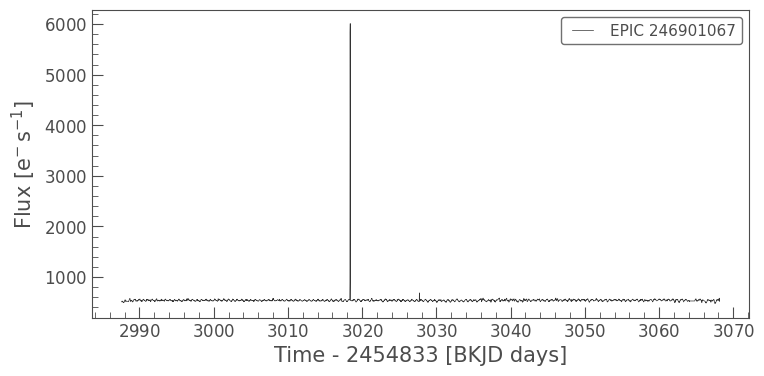

In [5]:
flc.plot()

In [6]:
flc = flc.detrend("savgol")

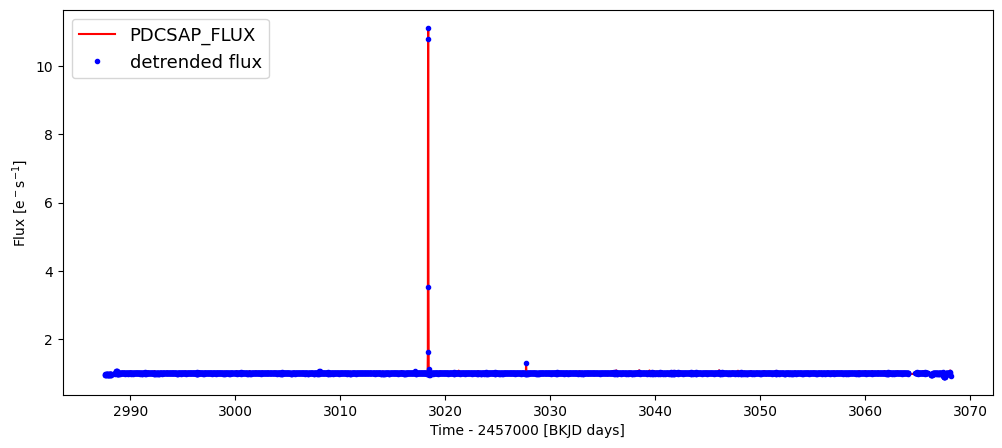

In [7]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(2622, 2623)
#plt.ylim(0.95,1.4)
plt.legend(loc=2,fontsize=13);

In [9]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,33,39,140929,140936,2988.623782,2988.766809,797.7578984569262,28.468336702231845,0.07798027992248535,0.143027,3632.000000
1,1350,1354,142323,142328,3017.106094,3017.208252,448.07315689873974,27.198592328557336,0.06799733638763428,0.102159,3632.000000
2,1407,1412,142384,142389,3018.352432,3018.454591,40931.62269671171,21.70699260692389,10.113903045654297,0.102159,3632.000000


In [8]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,29) gap.
Found 3 candidate(s) in the (29,1416) gap.
Found 0 candidate(s) in the (1416,3490) gap.
Found 0 candidate(s) in the (3490,3544) gap.
Found 0 candidate(s) in the (3544,3632) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
